In [319]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\PCCV\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


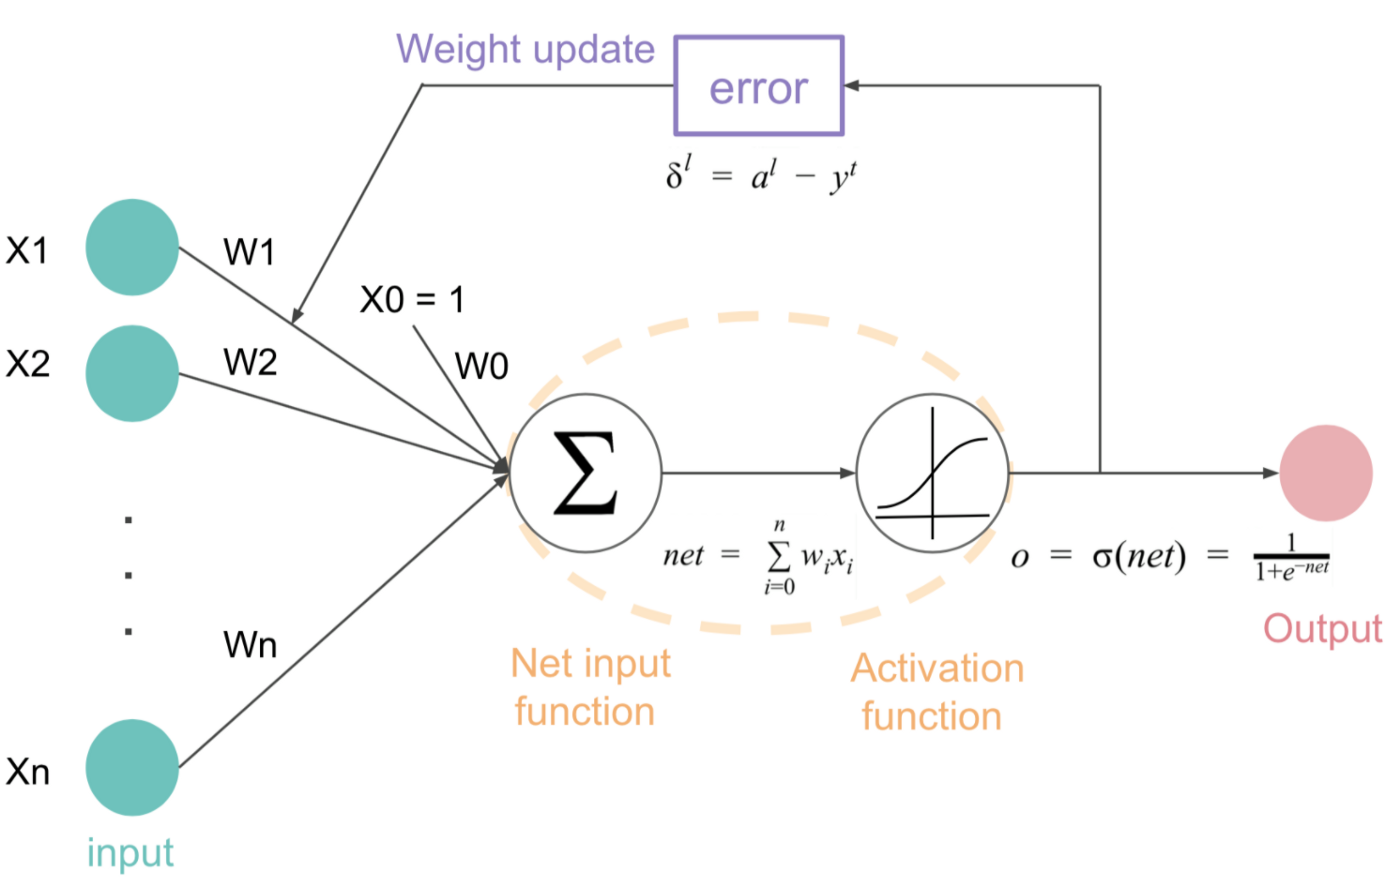

## ANN From Scratch

In [320]:
import numpy as np
import pandas as pd 

np.random.seed = 42

In [321]:
class ANN:
    def __init__(self, X, Y , learning_rate):
        self.X = X
        self.Y = Y
        self.weight = np.random.rand(self.X.shape[1] , 1) 
        self.learning_rate = learning_rate

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))


    def sigmoid_derivative(self, p):
        return p * ( 1 - p )



    def feedforward(self):
        Z = self.X @ self.weight
        a = self.sigmoid(Z) 
        return a



    def backprop(self):
        A = self.feedforward()  
        error = self.Y - A 
        grd = error * self.sigmoid_derivative(A)
        self.weight += self.learning_rate * (self.X.T @ grd)


    def fit(self, iterations=1000, verbose=1):
        for i in range(iterations):
            self.backprop()  
            
            if verbose and i % (iterations // 10) == 0:
                loss = np.mean((self.Y - self.feedforward()) ** 2) 
                print(f"Iteration {i}: \nLoss = {loss:.4f} , \nY actual = \n{self.Y} , \nY predicted = \n{self.feedforward()}")
                print("\n")

## `ii` Testing

In [322]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [323]:
model = ANN(X, y, learning_rate=10)
model.fit(iterations=1000, verbose=1)

Iteration 0: 
Loss = 0.2001 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.15281998]
 [0.28587006]
 [0.48816668]
 [0.07038188]]


Iteration 100: 
Loss = 0.0006 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.03093963]
 [0.97498727]
 [0.98040401]
 [0.02427132]]


Iteration 200: 
Loss = 0.0003 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.0217987 ]
 [0.98230916]
 [0.9859002 ]
 [0.01738857]]


Iteration 300: 
Loss = 0.0002 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.01774517]
 [0.98557727]
 [0.98843061]
 [0.01424402]]


Iteration 400: 
Loss = 0.0002 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.01533385]
 [0.98752689]
 [0.9899599 ]
 [0.0123498 ]]


Iteration 500: 
Loss = 0.0001 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.01369188]
 [0.98885666]
 [0.9910107 ]
 [0.01105071]]


Iteration 600: 
Loss = 0.0001 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.01248217]
 [0.98983744]
 [0.

----

## Multi-layer ANN

In [324]:
class ANN:
    def __init__(self, X, y, num_hidden_nodes):
        self.X = X
        self.Y = y
        self.num_hidden_nodes = num_hidden_nodes
        self.weight_input = np.random.rand(self.X.shape[1] , num_hidden_nodes) 
        self.weight_output = np.random.rand(self.num_hidden_nodes , self.Y.shape[1]) 
    
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))


    def sigmoid_derivative(self, p):
        return p * ( 1 - p )

    def feedforward(self):
        self.Z1 = self.X @ self.weight_input
        self.a1 = self.sigmoid(self.Z1)

        self.Z2 = self.a1 @ self.weight_output 
        self.a2 = self.sigmoid(self.Z2)

        return self.a2


    def backprop(self):
        a2 = self.feedforward()
        error = self.Y - a2 

        # output layer
        grd2 = error * self.sigmoid_derivative(a2)
        dW2 = np.dot(self.a1.T, grd2) 

        # hidden layer
        grd1 = np.dot(grd2, self.weight_output.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(self.X.T, grd1) 

        self.weight_output +=  dW2
        self.weight_input +=  dW1

    def fit(self, iterations, verbose=1):
        for i in range(iterations):
            self.backprop()  
            
            if verbose and i % (iterations // 10) == 0:
                loss = np.mean((self.Y - self.feedforward()) ** 2) 
                print(f"Iteration {i}: \nLoss = {loss:.4f} , \nY actual = \n{self.Y} , \nY predicted = \n{self.feedforward()}")
                print("\n")

## `ii` Testing

In [325]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [326]:
model = ANN(X, y, 8)
model.fit(iterations=1000, verbose=1)

Iteration 0: 
Loss = 0.3962 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.86687972]
 [0.92332797]
 [0.90015771]
 [0.90407832]]


Iteration 100: 
Loss = 0.0119 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.12794649]
 [0.88363121]
 [0.91362787]
 [0.10083266]]


Iteration 200: 
Loss = 0.0025 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.05880132]
 [0.94688625]
 [0.95915286]
 [0.04642453]]


Iteration 300: 
Loss = 0.0013 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.04174988]
 [0.96237507]
 [0.97041521]
 [0.03321057]]


Iteration 400: 
Loss = 0.0008 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.03359591]
 [0.96975919]
 [0.97588581]
 [0.02686518]]


Iteration 500: 
Loss = 0.0006 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.02867354]
 [0.97420787]
 [0.97922901]
 [0.02301786]]


Iteration 600: 
Loss = 0.0005 , 
Y actual = 
[[0.]
 [1.]
 [1.]
 [0.]] , 
Y predicted = 
[[0.02532047]
 [0.9772338 ]
 [0.

---

# ANN using Keras


## `0` Import Libraries & Load Dataset

In [327]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

tf.random.set_seed(42)
#np.random.seed = 42


In [328]:
dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [329]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [330]:
X =dataset.drop(columns=['Outcome'])
y =dataset['Outcome']

In [331]:
X.shape

(768, 8)

In [332]:
y.shape

(768,)

In [333]:
xtrain , xtest , ytrain , ytest = train_test_split(X , y , test_size=0.2)

## `i` Shallow network


In [334]:
model=Sequential()

model.add(Dense(5 , activation='relu' , input_shape=(X.shape[1],)))
model.add(Dense(1 , activation='sigmoid'))

model.summary()

C:\Users\PCCV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [335]:
X.shape

(768, 8)

In [336]:
768/32

24.0

In [337]:
model.compile(optimizer=keras.optimizers.Adam(0.01), loss="binary_crossentropy", metrics=["accuracy"])

In [338]:
history = model.fit(xtrain, ytrain, epochs=150, batch_size=32 , validation_data=(xtest,ytest))

Epoch 1/150


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5185 - loss: 9.1300 - val_accuracy: 0.6494 - val_loss: 4.7565
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6756 - loss: 2.9608 - val_accuracy: 0.5844 - val_loss: 2.2307
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5988 - loss: 1.8020 - val_accuracy: 0.6234 - val_loss: 1.4944
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6896 - loss: 1.1213 - val_accuracy: 0.6429 - val_loss: 1.1815
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6931 - loss: 0.9430 - val_accuracy: 0.6364 - val_loss: 1.1405
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6969 - loss: 0.8842 - val_accuracy: 0.6364 - val_loss: 1.0759
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6994 - loss: 0.8340 - val_accuracy: 0.6299 - val_loss: 0.9798
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7037 - loss: 0.7830 - val_accuracy: 0.6299 - val_loss: 

In [339]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [340]:
history.history['accuracy'][-1]

0.7752442955970764

In [341]:
history.history['val_accuracy'][-1]

0.7337662577629089

In [342]:
max(history.history['accuracy'])

0.7752442955970764

In [343]:
model.evaluate(xtrain,ytrain)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7671 - loss: 0.4997 


[0.48417285084724426, 0.767100989818573]

In [344]:
model.evaluate(xtest,ytest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7129 - loss: 0.5076 


[0.5040225982666016, 0.7337662577629089]

Text(0.5, 1.0, 'Model Acuraccy')

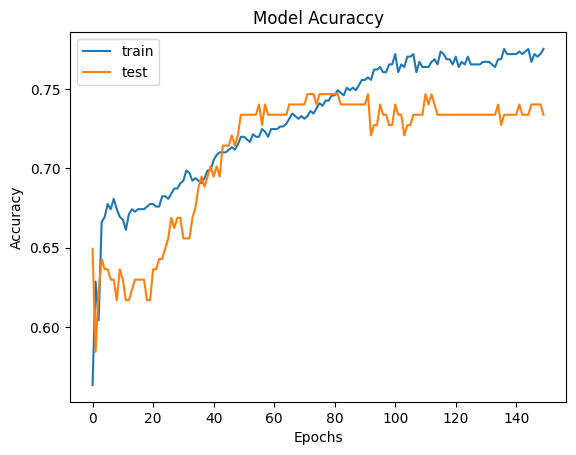

In [345]:
plt.plot(history.history['accuracy'] )
plt.plot(history.history['val_accuracy'] )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.title('Model Acuraccy')

Text(0.5, 1.0, 'Model Loss')

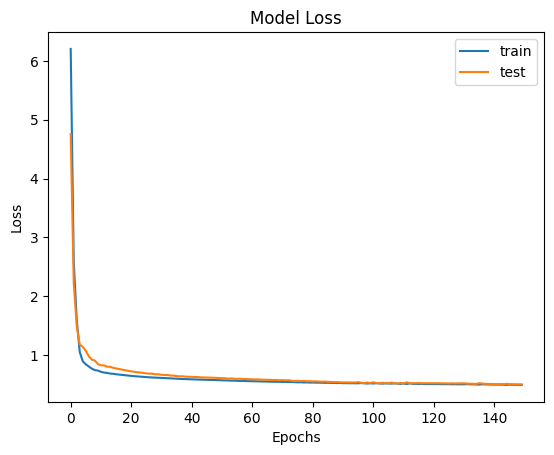

In [346]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.title('Model Loss')

## `ii` Deep network


In [347]:
model1 = Sequential()

model1.add(Dense(12 , activation='relu',input_shape=(X.shape[1],)))
model1.add(Dense(8 , activation='relu'))
model1.add(Dense(1 , activation='sigmoid'))

model1.summary()

C:\Users\PCCV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [348]:
model1.compile(optimizer=keras.optimizers.Adam(0.01), loss="binary_crossentropy", metrics=["accuracy"])

In [349]:
history1 = model1.fit(xtrain,ytrain,epochs=150,batch_size=32, validation_data=(xtest,ytest))

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6256 - loss: 3.5115 - val_accuracy: 0.6299 - val_loss: 1.3200
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6601 - loss: 0.9162 - val_accuracy: 0.6104 - val_loss: 0.7167
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6702 - loss: 0.6774 - val_accuracy: 0.6039 - val_loss: 0.7208
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6352 - loss: 0.7694 - val_accuracy: 0.6299 - val_loss: 0.6538
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6689 - loss: 0.6389 - val_accuracy: 0.6039 - val_loss: 0.6731
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6566 - loss: 0.7050 - val_accuracy: 0.6104 - val_loss: 0.6444
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6570 - loss: 0.6668 - val_accuracy: 0.6299 - val_loss: 0.6539
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6508 - loss: 0.6858 - val_accuracy: 0.6494 -

In [350]:
history1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [351]:
model1.evaluate(xtrain,ytrain)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7256 - loss: 0.5147 


[0.4973672330379486, 0.7410423159599304]

In [352]:
model1.evaluate(xtest,ytest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6535 - loss: 0.6028 


[0.6132556796073914, 0.649350643157959]

Text(0.5, 1.0, 'Model Acuraccy')

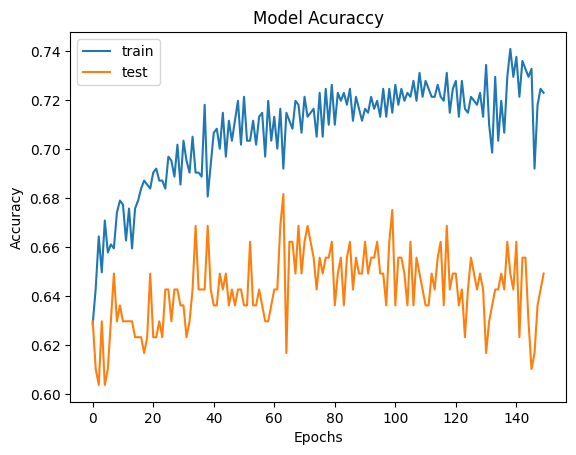

In [353]:
plt.plot(history1.history['accuracy'] )
plt.plot(history1.history['val_accuracy'] )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train' , 'test'])
plt.title('Model Acuraccy')

Text(0.5, 1.0, 'Model Loss')

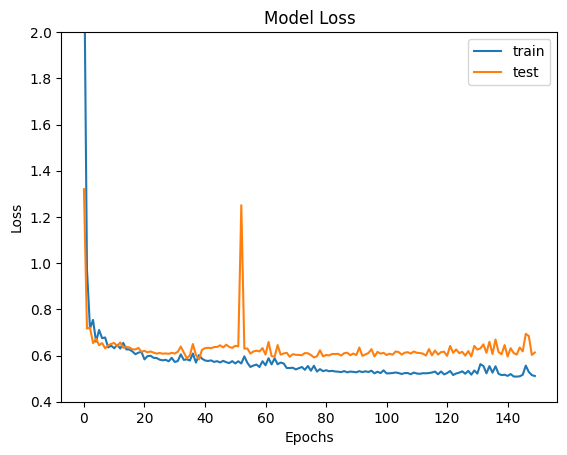

In [354]:
plt.plot(history1.history['loss'] )
plt.plot(history1.history['val_loss'] )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.4,2)
plt.legend(['train' , 'test'])
plt.title('Model Loss')

## `iii` Deeper network


In [363]:
model2 = Sequential()

model2.add(Dense(32 , activation='relu',input_shape=(X.shape[1],)))
model2.add(Dense(12 , activation='relu'))
model2.add(Dense(8 , activation='relu'))
model2.add(Dense(1 , activation='sigmoid'))

model2.summary()

C:\Users\PCCV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 12)             │           396 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 797 (3.11 KB)

 Trainable params: 797 (3.11 KB)

 Non-trainable params: 0 (0.00 B)

In [364]:
model2.compile(optimizer=keras.optimizers.Adam(0.01) , loss='binary_crossentropy' , metrics=['accuracy'])

In [365]:
history2 = model2.fit(xtrain,ytrain,epochs=150,batch_size=32, validation_data=(xtest,ytest))

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5622 - loss: 1.6810 - val_accuracy: 0.6429 - val_loss: 0.6654
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6822 - loss: 0.6064 - val_accuracy: 0.6494 - val_loss: 0.6628
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6568 - loss: 0.5933 - val_accuracy: 0.6299 - val_loss: 0.6248
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6948 - loss: 0.5698 - val_accuracy: 0.6753 - val_loss: 0.6206
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7137 - loss: 0.5658 - val_accuracy: 0.6818 - val_loss: 0.6078
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6831 - loss: 0.5654 - val_accuracy: 0.6623 - val_loss: 0.6279
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6939 - loss: 0.5651 - val_accuracy: 0.5974 - val_loss: 0.6568
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6724 - loss: 0.5771 - val_accuracy: 0.6753 -

In [366]:
history2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [367]:
model2.evaluate(xtrain,ytrain)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7706 - loss: 0.4492 


[0.43958330154418945, 0.7882736325263977]

In [368]:
model2.evaluate(xtest,ytest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6760 - loss: 0.5872 


[0.5804974436759949, 0.7207792401313782]

Text(0.5, 1.0, 'Model Acuraccy')

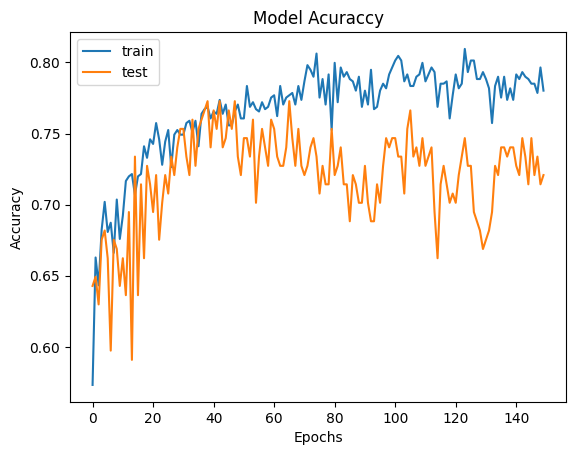

In [369]:
plt.plot(history2.history['accuracy'] )
plt.plot(history2.history['val_accuracy'] )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train' , 'test'])
plt.title('Model Acuraccy')

Text(0.5, 1.0, 'Model Loss')

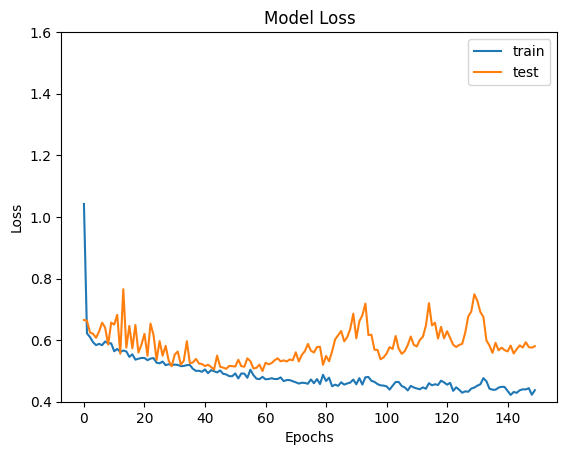

In [370]:
plt.plot(history2.history['loss'] )
plt.plot(history2.history['val_loss'] )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.4,1.6)
plt.legend(['train','test'])
plt.title('Model Loss')

----------------------------------------------
